![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Niloufar Saharkhiz
***

## Overview

This project aims to provide insights for the head of Microsoft's new movie studio about successful movie types at the box office. Exploratory data analysis using data from [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/) shows that the top three movie genres in terms of total gross income are Adventure, Action, and Mystery. In addition, Mystery, Documentary, and Biography movie genres have the highest average rating among all the other movie categories. The head of Microsoft movie studio can use this analysis to decide what type of films to create. 

## Business Problem

Microsoft plans to invest on creating movies based on the type of the films that are currently successful at the box office. They may get insights on this by investigating the profit that each movie genre has made. This includes earnings from the domestic and global offices. The average rating for each movie category would also helpful to take into consideration. 

## Data Understanding

The first sourse of data for these analysis is [IMDB](https://www.imdb.com/) website which is an online database of information related to films. The data contains infromation for 73856 movies, including genres,average rating and number of votes associated with each movie. The second source of the data is [Box Office Mojo](https://www.boxofficemojo.com/) website which contains information on domestic gross and foreign gross for 3387 movies. The information on movies genres, average rating and gross income both from domestic and international sources for the movies shared between the two databases will be used for the analysis. 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile

%matplotlib inline

### IMDB data
The dataset from IMDB website contains information on 73856 movies. We only use a subset of data under movie_basics and movie_ratings tables on the SQL dataset. These two tables include information on movie-id, primary title, original title, start year, runtime, genre, average rating and number of votes. 

In [2]:
#Load IMDB dataset
zf = zipfile.ZipFile('zippedData/im.db.zip', 'r')
conn = sqlite3.connect('im.db')
q = """
SELECT * FROM movie_basics
JOIN movie_ratings
    USING (movie_id);
"""
imdb = pd.read_sql(q, conn)

In [3]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Box Office Mojo (BOM) data
Box Office Mojo is an webiste that tracks the box office revenue and was used as the second sourse for this study. The 
dataset contains information on movie title, studio, domestic and foreign gross and year of the production of 3387 movies.

In [4]:
#Load BOM dataset
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation


In [6]:
import code.data_preparation as dp

### Data Cleaning
The first step in data cleaning is to normalize the column names for both datasets. Then, the unnecessary columns are dropped. The `title` and `year` columns are normalized to merge two datasets and create a single dataset for feature engineering and analysis. 
Any data with missing values are excluded, and data types for numerical columns are modified to pave the way for mathematical calculations in the next step. 

### Feature Engineering
New features are created to reflect the `total_gross` income as a summation of domestic and foreign revenues and to reflect the primary genre of each movie in the combined dataset. As a result, the `full_dataset` has the shared movies between the two sources (i.e., 1303 movies) that are 1:1 merged using the `title` and `year` of the films. This dataset contains different features of the genre, run time, average rating, and gross income of each movie.

In [7]:
full_dataset = dp.full_clean(imdb, bom)
full_dataset.head()

,title,year,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,genre0,genre1,genre2
0,Avengers: Age Of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594,459000000.0,946400000.0,1.405400e+09,Action,Adventure,Sci-Fi
1,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,700100000.0,646900000.0,1.347000e+09,Action,Adventure,Sci-Fi
2,Star Wars: The Last Jedi,2017,"Action,Adventure,Fantasy",7.1,462903,620200000.0,712400000.0,1.332600e+09,Action,Adventure,Fantasy
3,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",6.2,219125,417700000.0,891800000.0,1.309500e+09,Action,Adventure,Sci-Fi
4,Frozen,2013,"Adventure,Animation,Comedy",7.5,516998,400700000.0,875700000.0,1.276400e+09,Adventure,Animation,Comedy


## Analysis

In [8]:
import code.visualizations as viz

#### Most Profitable Movie Genres
The top three main movies geners with highest total gross income are Adventure ($\$$ 282 M), Action ($\$$ 247 M), and Mystery ($\$$ 238 M). Interestingly, these geners are also on the top of the list of both domestic and foregin gross incomes. On the other hand, the movie geners with lowest total gross income are Fantasy ($\$$ 29 M), Documentary ($\$$ 26 M), and Music ($\$$ 8 M). 

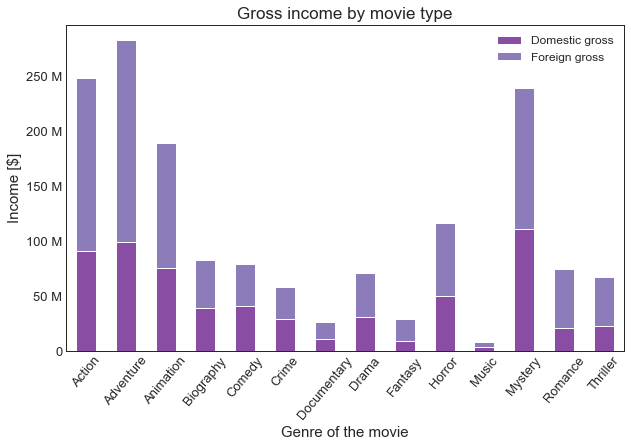

In [9]:
viz.genre_vs_income(full_dataset)

#### Most Popular Movie Geners
The top three main movie geners with highest average rating were found to be Mystery, Documentary, and Biography. The Mystery category had the highest number of votes, which gives more strength to the popularity of the category. The documentary category had reletitatively  The movie generes with the lowest average rating were found to be Adventure, Comedy, and Horor. 

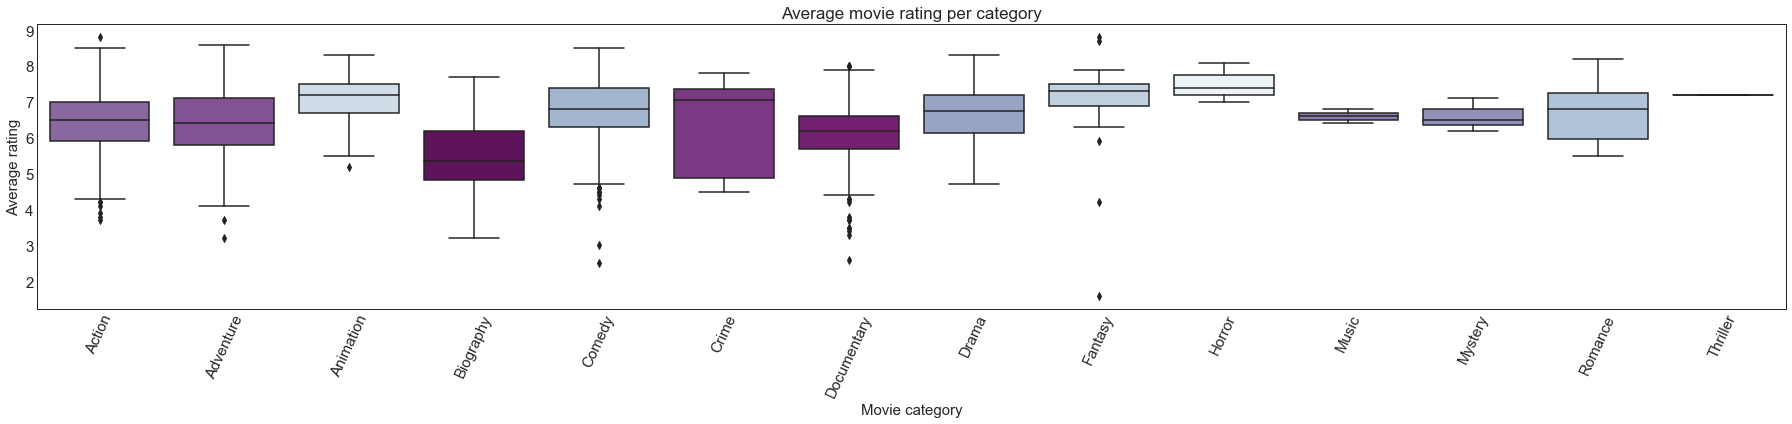

In [10]:
viz.genre_vs_rating(full_dataset)

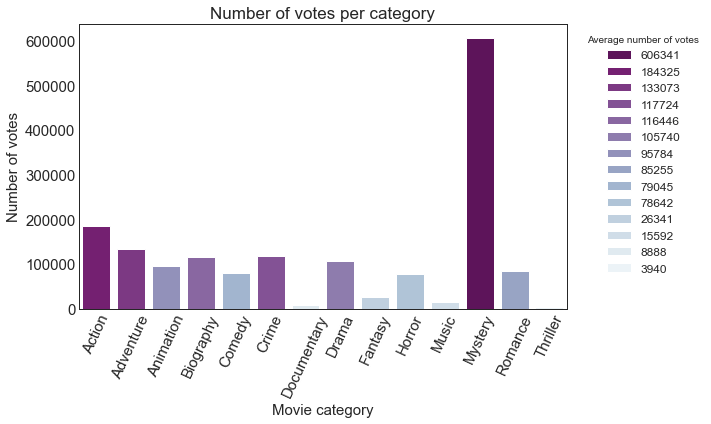

In [11]:
viz.genre_vs_vote(full_dataset)

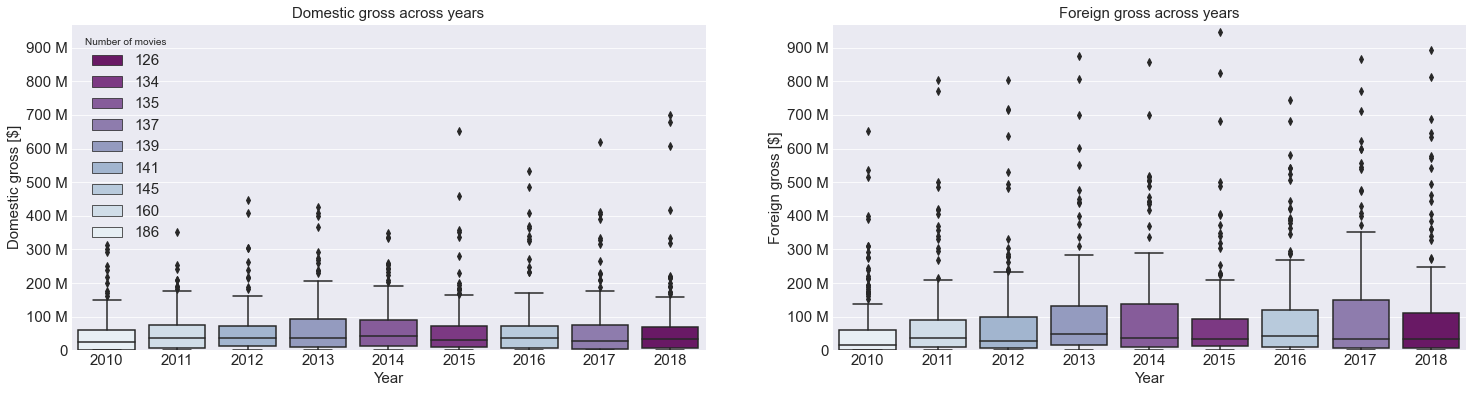

In [20]:
viz.income_vs_year(full_dataset)

No handles with labels found to put in legend.


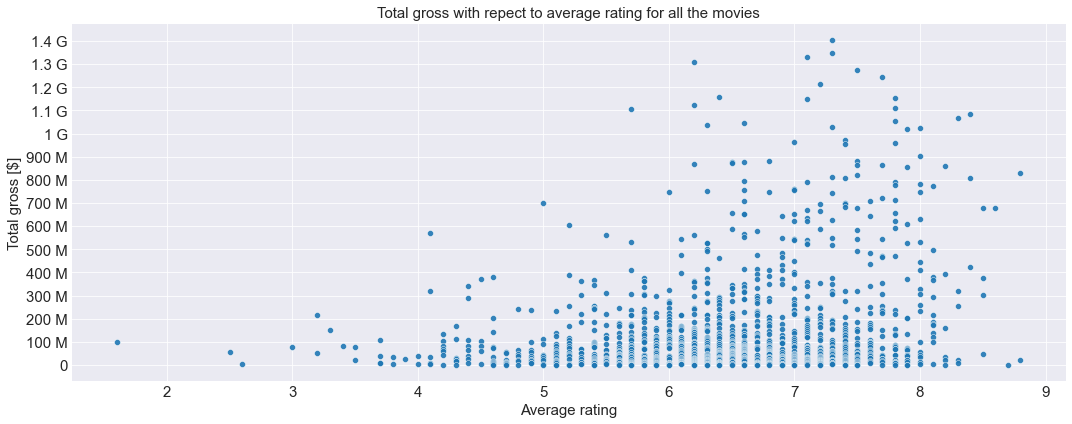

In [23]:
viz.income_vs_rating(full_dataset)


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***